In [32]:
# 导入fashion数据集 28 ,28 , 1
import tensorflow as tf 
fashion_mnist = tf.keras.datasets.fashion_mnist
# validation 验证
(x_train , y_train) , (x_val,y_val) = fashion_mnist.load_data()

In [33]:
class_names = ['t-shirt' , 'trouser' , 'pullover' , 'dress' , 'coat' , 'sandal' , 'shirt' , 'sneaker' , 'bag' , 'ankle boot']

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_val.shape

(10000, 28, 28)

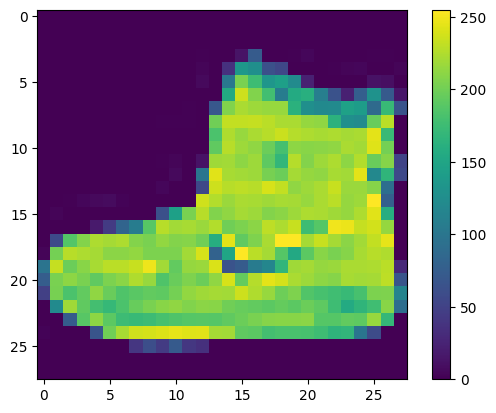

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
# 归一化
x_train = x_train / 255.0
x_val = x_val / 255.0

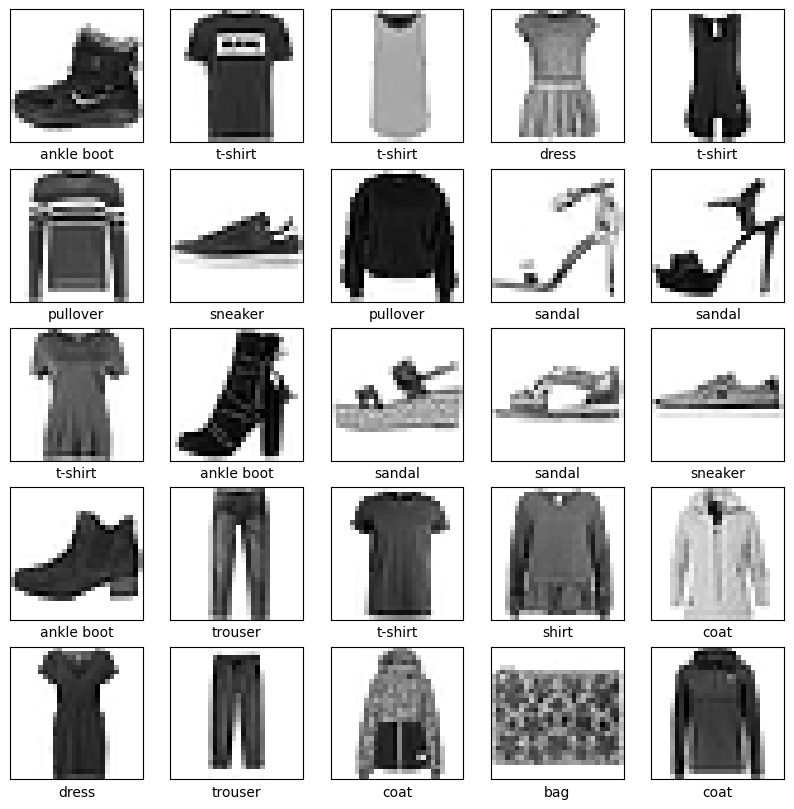

In [38]:
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i] ,cmap = plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [ ]:
from  tensorflow import keras
# 模型搭建
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])
""" DROP-OUT 防止过拟合方法
# 构建一个简单的 MLP模型
model = keras.Sequential([
    layers.Dense(128, activation='relu'),   # 隐藏层 1
    layers.Dropout(0.5),  # 50% 的神经元被随机丢弃
    layers.Dense(64, activation='relu'),    # 隐藏层 2
    layers.Dropout(0.5),  # 50% 的神经元被随机丢弃
    layers.Dense(10, activation='softmax')  # 输出层
])
"""

d:\Anaconda\envs\python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



**1. Keras 模型构建**
| 方法 | 作用 | 常见参数 | 参数解释 |
|------|------|--------|---------|
| `Sequential()` | 顺序模型（层按顺序堆叠） | `layers` | 传入层列表 |
| `Model()` | 函数式模型 | `inputs, outputs` | 指定输入和输出张量 |



**2. Keras 层（Layers）**
| 层 | 作用 | 关键参数 | 参数解释 |
|----|------|--------|---------|
| `Dense()` | 全连接层 | `units` | 神经元个数 |
| | | `activation` | 激活函数（`relu`, `sigmoid`, `softmax`） |
| | | `kernel_initializer` | 权重初始化（`glorot_uniform`, `he_normal`） |
| | | `bias_initializer` | 偏置初始化（`zeros`, `ones`） |
| `Conv2D()` | 卷积层 | `filters` | 卷积核个数 |
| | | `kernel_size` | 卷积核大小，如 `(3,3)` |
| | | `strides` | 步长 |
| | | `padding` | `valid`（无填充）或 `same`（填充使输出尺寸不变） |
| `MaxPooling2D()` | 最大池化 | `pool_size` | 池化窗口大小，如 `(2,2)` |
| `Flatten()` | 展平层 | 无 | 用于连接全连接层 |
| `Dropout()` | 防止过拟合 | `rate` | 失活神经元比例，如 `0.5` |


**3. Keras 激活函数**
| 激活函数 | 作用 | 适用场景 |
|---------|------|--------|
| `relu` | 解决梯度消失问题 | 大多数神经网络 |
| `sigmoid` | 输出范围 (0,1) | 二分类问题 |
| `softmax` | 多分类输出概率 | 多分类问题 |
| `tanh` | 输出范围 (-1,1) | RNN 结构 |




In [40]:
# 模型加载
model.compile(
    optimizer = 'adam', # 优化器
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

**4. Keras 优化器**
| 优化器 | 作用 | 关键参数 | 适用场景 |
|-------|-----|--------|---------|
| `adam` | 自适应学习率 | `learning_rate`（默认 0.001） | 大多数任务，推荐 |
| `sgd` | 随机梯度下降 | `momentum`（动量） | 简单任务 |
| `rmsprop` | 适应不同梯度大小 | `learning_rate` | 适用于 RNN |

**5. Keras 损失函数**
| 损失函数 | 适用任务 | 解释 |
|---------|--------|-----|
| `mse` | 回归 | 均方误差 |
| `mae` | 回归 | 平均绝对误差 |
| `binary_crossentropy` | 二分类 | 交叉熵 |
| `categorical_crossentropy` | 多分类（独热编码） | 多分类交叉熵 |
| `sparse_categorical_crossentropy` | 多分类（整数标签） | 用于非独热编码分类 |





**6. 评估指标（Metrics）**
| 评估指标 | 适用任务 | 作用 | 关键参数 | 说明 |
|---------|--------|-----|--------|------|
| `accuracy` | 分类 | 计算正确分类样本的比例 | 无 | 适用于 **独热编码** 数据（如 `categorical_crossentropy`） |
| `sparse_categorical_accuracy` | 分类 | 适用于整数标签分类任务 | 无 | 适用于 **整数标签** 数据（如 `sparse_categorical_crossentropy`） |
| `binary_accuracy` | 二分类 | 计算二分类任务的准确率 | 无 | 适用于 `binary_crossentropy` |
| `AUC` | 二分类 | 计算 ROC 曲线下的面积 | `num_thresholds` | 衡量分类器性能 |
| `Precision` | 分类 | 计算精确率（精准率） | `thresholds` | TP / (TP + FP) |
| `Recall` | 分类 | 计算召回率（灵敏度） | `thresholds` | TP / (TP + FN) |
| `F1-Score` | 分类 | `2 * (Precision * Recall) / (Precision + Recall)` | 组合 `Precision` 和 `Recall` |
| `top_k_categorical_accuracy` | 多分类 | 计算前 K 个类别中是否有正确类别 | `k=5` | 适用于 **多分类任务**（Top-K 评估） |

---

| 评估指标 | 适用任务 | 作用 | 关键参数 | 说明 |
|---------|--------|-----|--------|------|
| `mse`（均方误差） | 回归 | 计算预测值与真实值的平方误差 | 无 | 对异常值敏感 |
| `mae`（平均绝对误差） | 回归 | 计算预测值与真实值的绝对误差 | 无 | 适用于稳健回归 |
| `mape`（平均百分比误差） | 回归 | 计算相对误差 | 无 | 适用于数据量级不同的回归问题 |
| `msle`（均方对数误差） | 回归 | 计算对数空间的误差 | 无 | 适用于指数增长的数据 |





In [41]:
# 模型训练
# model.fit() 方法会返回一个 History 对象，其中 history.history 字典存储了训练过程中损失和评估指标的变化情况
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7809 - loss: 0.6281
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8608 - loss: 0.3834
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8779 - loss: 0.3315
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8824 - loss: 0.3138
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8924 - loss: 0.2915
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9010 - loss: 0.2757
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9019 - loss: 0.2653
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9060 - loss: 0.2543
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9108 - loss: 0.2427
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9117 - loss: 0.2417


**7. Keras 训练参数**
| 方法 | 作用 | 关键参数 | 参数解释 |
|------|------|--------|---------|
| `fit()` | 训练模型 | `epochs` | 训练轮数 |
| | | `batch_size` | 批量大小（默认 32） |
| | | `validation_split` | 训练集划分验证集的比例 |
| | | `verbose` | 训练信息显示（0: 静默, 1: 进度条, 2: 简要信息） |



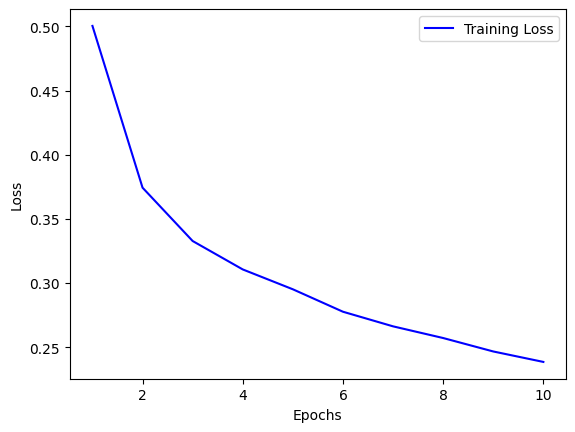

In [42]:
# 获取训练过程中的损失值
loss_values = history.history['loss']  # 训练损失
epochs = range(1, len(loss_values) + 1)

#  绘制损失曲线
plt.plot(epochs, loss_values, 'b-', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# 模型评估
val_loss,val_acc = model.evaluate (x_val,y_val , verbose=2)
print('test accuracy : ' ,val_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8735 - loss: 0.3582
test accuracy :  0.8734999895095825


In [44]:
# 模型预测
pred = model.predict(x_val)
pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [47]:
import numpy as np
np.argmax(pred[0])

np.int64(9)

**8. 评估与预测**
| 方法 | 作用 | 关键参数 | 说明 |
|------|------|--------|------|
| `evaluate()` | 评估模型 | `X_test, y_test` | 返回损失值和评估指标 |
| `predict()` | 预测 | `X_new` | 生成预测值 |

In [48]:
# 回调函数
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),  # 提前停止
    ModelCheckpoint('best_model.h5', save_best_only=True)  # 保存最优模型
]

model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/50
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - loss: 0.2266

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9139 - loss: 0.2266 - val_accuracy: 0.8804 - val_loss: 0.3354
Epoch 2/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9187 - loss: 0.2191

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.2191 - val_accuracy: 0.8863 - val_loss: 0.3290
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9223 - loss: 0.2131 - val_accuracy: 0.8839 - val_loss: 0.3361
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9218 - loss: 0.2099 - val_accuracy: 0.8818 - val_loss: 0.3467
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9241 - loss: 0.2038 - val_accuracy: 0.8869 - val_loss: 0.3328


**9. Keras 回调函数（Callbacks）**
| 回调函数 | 作用 | 关键参数 | 说明 |
|---------|-----|--------|-----|
| `EarlyStopping()` | 早停 | `monitor`（监测值，如 `val_loss`） | 当 `val_loss` 连续 `patience` 轮未下降，则停止训练 |
| | | `patience`（耐心轮数） | |
| `ModelCheckpoint()` | 保存最优模型 | `filepath` | 指定保存路径，如 `"best_model.h5"` |
| | | `save_best_only` | 仅保存最优模型 |
| `ReduceLROnPlateau()` | 学习率衰减 | `monitor` | 监测 `val_loss`，如果不下降，则降低学习率 |
| `TensorBoard()` | 训练过程可视化 | `log_dir` | 生成 TensorBoard 日志文件 |



In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [51]:
model.save(filepath='model/model.h5')

In [53]:
model_load = keras.models.load_model('model/model.h5')

In [57]:
pred = model_load.predict(x_val)
np.argmax(pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(9)

**10. Keras 其他实用工具**
| 方法 | 作用 | 关键参数 | 说明 |
|------|------|--------|------|
| `model.summary()` | 查看模型结构 | 无 | 输出模型层数、参数等信息 |
| `model.save('model.h5')` | 保存模型 | `filepath` | HDF5 格式 |
| `keras.models.load_model('model.h5')` | 加载模型 | `filepath` | 读取已保存的 Keras 模型 |


In [59]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label], 
            100 * np.max(predictions_array), 
            class_names[true_label]
        ), 
        color=color
    )


In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0, 1])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")  # 绘制置信度条形图
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')  # 预测标签为红色
    thisplot[true_label].set_color('blue')  # 真实标签为蓝色

# 需要提前定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


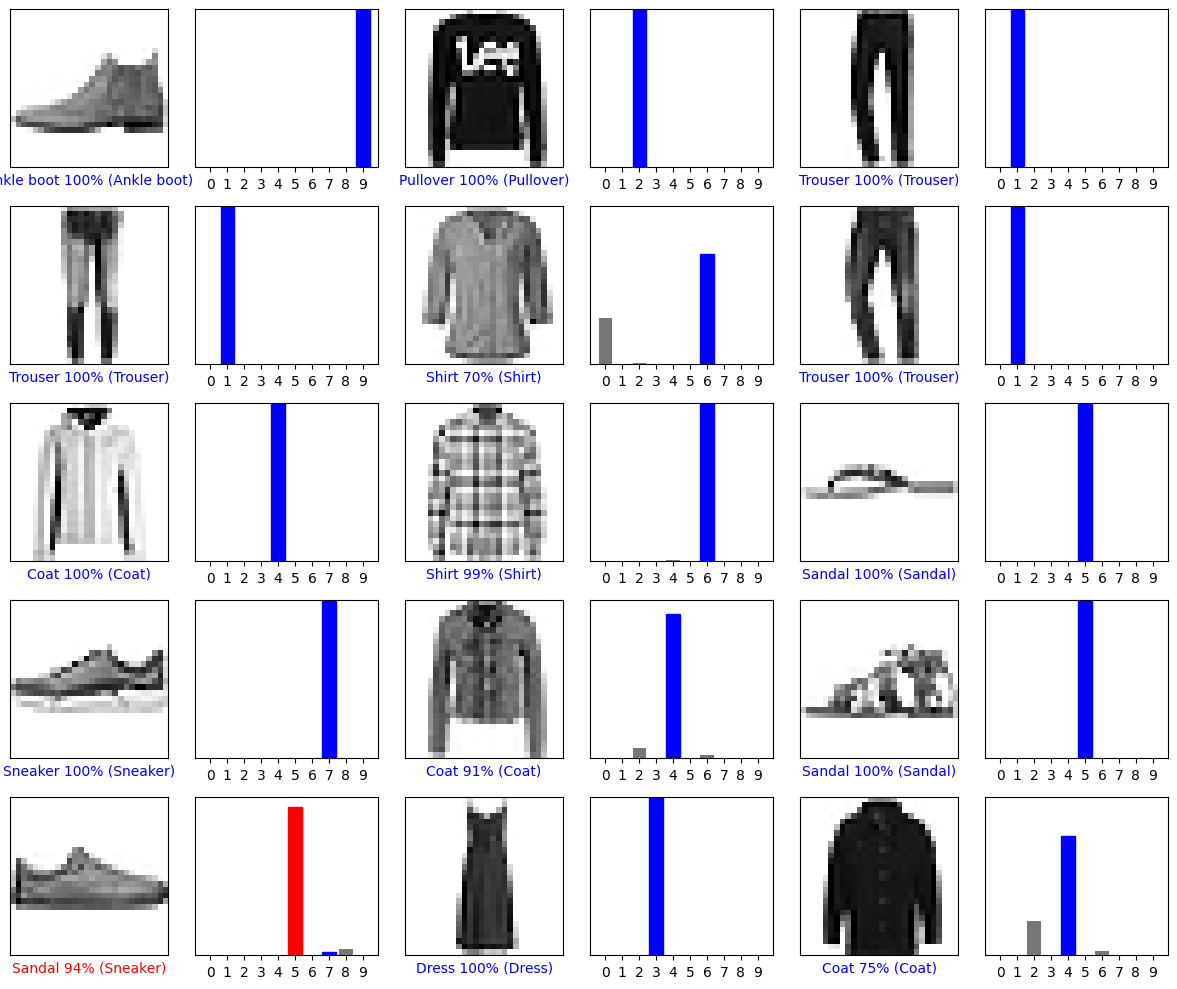

In [61]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, pred[i], y_val, x_val)  # 需要定义 plot_image 函数

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, pred[i], y_val)  # 需要定义 plot_value_array 函数

plt.tight_layout()
plt.show()



**总结**
| 步骤 | 关键方法 | 说明 |
|------|--------|------|
| **1. 构建模型** | `keras.Sequential()` 或 `keras.Model()` | 选择 `Sequential` 或 `Functional` |
| **2. 添加层** | `keras.layers.Dense()` `keras.layers.Conv2D()` `keras.layers.LSTM()` | 全连接层、卷积层、LSTM |
| **3. 编译模型** | `model.compile(optimizer, loss, metrics)` | 指定优化器、损失函数、评估指标 |
| **4. 训练模型** | `model.fit(X_train, y_train, epochs, batch_size, validation_split)` | 训练数据并返回 history |
| **5. 评估模型** | `model.evaluate(X_test, y_test)` | 计算测试集上的损失和准确率 |
| **6. 预测新数据** | `model.predict(X_new)` | 进行预测 |
| **7. 迁移学习** | `keras.applications.VGG16()` | 使用预训练模型加速训练 |
